In [ ]:
ls

master.csv    summer-products-with-rating-and-performance_2020-08.csv
sample_data/


# Q1

In [ ]:
import pandas as pd
master_df=pd.read_csv("master.csv")
display(master_df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
print('Number of Records = '+str(master_df.shape[0]))
print('Number of Variables = '+str(master_df.shape[1]))

Number of Records = 27820
Number of Variables = 12


In [ ]:
master_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Data is for time period 1985-2016

In [ ]:
cols=master_df.columns.values
cols

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype=object)

In [ ]:
master_df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
master_df["country"].nunique()

101

In [ ]:
master_df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [ ]:
pd.unique(master_df["generation"])

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [ ]:
master_df.apply(lambda x: len(x.unique()))

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            306
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

Population, Suicides_No, gdp_for_year, gdp_per_capita : Integer Variables<br>
Suicides/100k pop, HDI for year: Continuous Variables<br>
Year: Temporal Variable<br>
Country, Sex, Country-Year: Categorical Variables<br>
Generation & Age are categorical variables representing the same information with an age group as a range of years of age given a name<br>


In [ ]:
master_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Only values for 'HDI for year' are missing.<br>
Number of records without missing entries = Total-HDI Missing=27820-19456=8364



In [ ]:
master_df[master_df["country"]=="Albania"]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
259,Albania,2010,female,35-54 years,12,394593,3.04,Albania2010,0.722,"11,926,953,259",4359,Generation X
260,Albania,2010,female,55-74 years,7,241491,2.90,Albania2010,0.722,"11,926,953,259",4359,Silent
261,Albania,2010,female,15-24 years,6,263581,2.28,Albania2010,0.722,"11,926,953,259",4359,Millenials
262,Albania,2010,female,5-14 years,2,223969,0.89,Albania2010,0.722,"11,926,953,259",4359,Generation Z


Discrete Variables: Year, Suicides, Population, GDP for Year, GDP per capita

In [ ]:
master_df[' gdp_for_year ($) ']=master_df[' gdp_for_year ($) '].apply(lambda x:int(x.replace(",","")))
master_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [ ]:
discrete=['year','suicides_no','population','gdp_per_capita ($)']
master_df[discrete].mode()

,year,suicides_no,population,gdp_per_capita ($)
0,2009.0,0.0,24000.0,1299
1,NaN,NaN,NaN,2303
2,NaN,NaN,NaN,4104


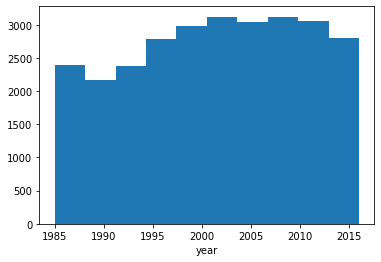

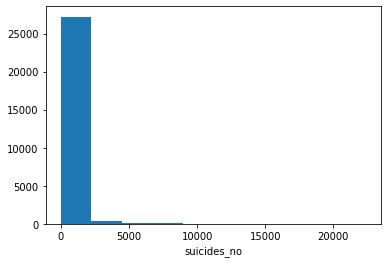

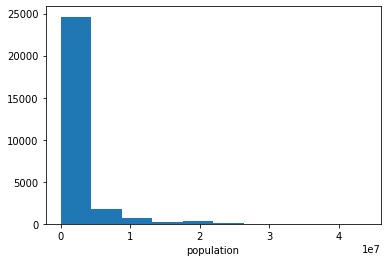

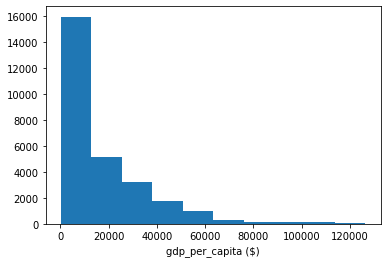

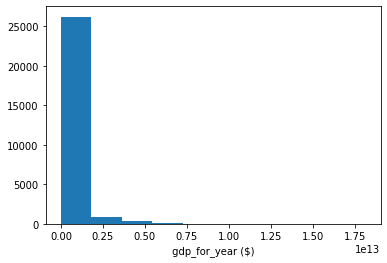

In [ ]:
discrete.append(' gdp_for_year ($) ')
import matplotlib.pyplot as plt
for col in discrete:
  plt.hist(master_df[col])
  plt.xlabel(col)
  plt.show()

In [ ]:
for obj in discrete:
  f=np.array(master_df[obj].value_counts())
  fsum=np.sum(f)
  p=f/fsum
  gi = 1 - np.sum(np.square(p))
  print("Gini Index for variable "+obj+" = "+str(gi))

Gini Index for variable year = 0.9670705743660721
Gini Index for variable suicides_no = 0.9671093855384388
Gini Index for variable population = 0.9999533175425259
Gini Index for variable gdp_per_capita ($) = 0.9995353305965586
Gini Index for variable  gdp_for_year ($)  = 0.9995690691055419


As all the indices are close to 1, there is great diversity in data across all variables.

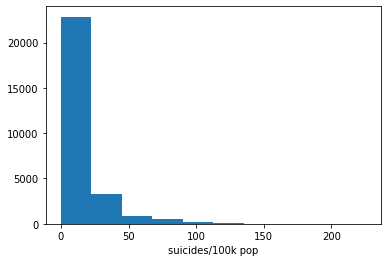

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


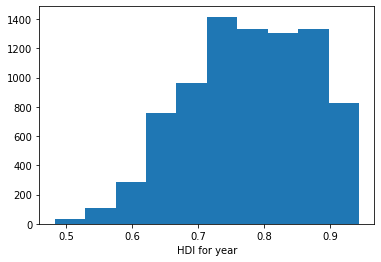

In [ ]:
continuous=["suicides/100k pop","HDI for year"]
for col in continuous:
  plt.hist(master_df[col])
  plt.xlabel(col)
  plt.show()

In [ ]:
for item in continuous:
  print("\033[1m"+item+"\033[0m")
  colm=master_df[item]
  print("Mean="+str(colm.mean()))
  print("Variance="+str(colm.var()))
  print("Skew="+str(colm.skew()))
  print("Median="+str(colm.median()))
  print("Inter-quartile Range="+str(colm.quantile(0.25))+"-"+str(colm.quantile(0.75)))

suicides/100k pop
Mean=12.816097411933894
Variance=359.53889995312005
Skew=2.963414476605633
Median=5.99
Inter-quartile Range=0.92-16.62
HDI for year
Mean=0.7766011477761785
Variance=0.008717342272985932
Skew=-0.30087744889575657
Median=0.779
Inter-quartile Range=0.713-0.855


{'boxes': [<matplotlib.lines.Line2D at 0x7fa2a80f2208>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a80f2c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a80ff6d8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a80ff358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a80f2518>,
  <matplotlib.lines.Line2D at 0x7fa2a80f2898>]}

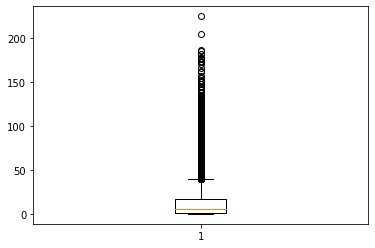

In [ ]:
plt.boxplot(master_df["suicides/100k pop"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f0c99aff4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0c99affeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0c99b0b978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0c99b0b5f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0c99aff7b8>,
  <matplotlib.lines.Line2D at 0x7f0c99affb38>]}

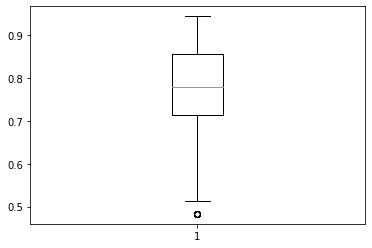

In [ ]:
hdi=master_df["HDI for year"]
plt.boxplot(hdi[hdi.notnull()])

Text(0.5, 0, 'HDI for year')

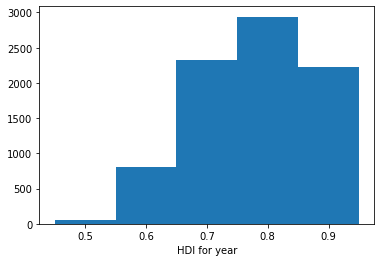

In [ ]:
plt.hist(hdi,bins=[0.45,0.55,0.65,0.75,0.85,0.95])
plt.xlabel("HDI for year")

Text(0.5, 0, 'Suicides per 100,000 population')

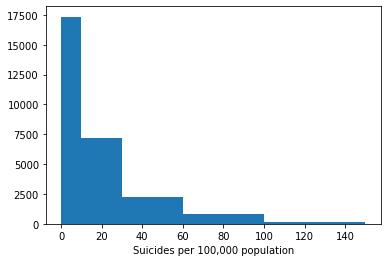

In [ ]:
plt.hist(master_df["suicides/100k pop"],bins=[0,10,30,60,100,150])
plt.xlabel("Suicides per 100,000 population")

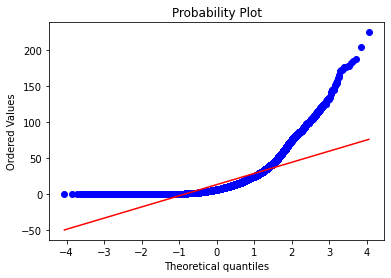

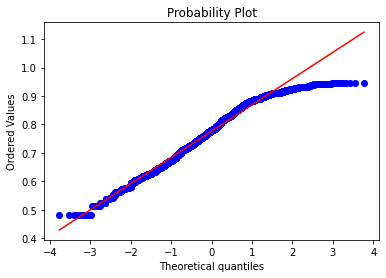

In [ ]:
import scipy.stats as ss
for item in continuous:
  colm=master_df[item].dropna()
  ss.probplot(colm,plot=plt)
  plt.show()

Almost half of data has zero or very few suicides per 100k population, hence this variable has distribution which is right-skewed.<br>
HDI for year variable has a left-skewed distribution as concluded from boxplot, bargraph, negative skew obtained

-0.6018184856031762


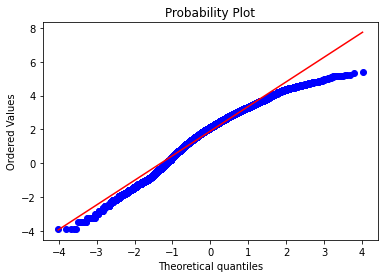

-0.5597907361586473


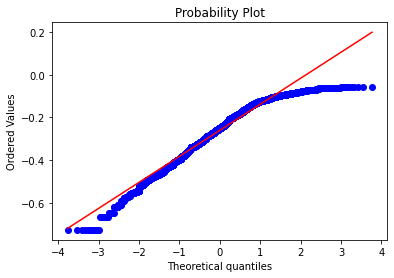

In [ ]:
import math
for item in continuous:
  colm=master_df[item][master_df[item]!=0].dropna()
  coln=colm.apply(lambda x:math.log(x))
  print(coln.skew())
  ss.probplot(coln,plot=plt)
  plt.show()

They don't seem to follow lognormal distribution as the qq plot with log of positive values showing negative (left) skewness

In [ ]:
countries=master_df["country"].unique().tolist()
crsui=[]
cpop=[]
for country in countries:
  cpop.append(master_df[master_df["country"]==country]['population'].sum())
  crsui.append(master_df[master_df["country"]==country]["suicides/100k pop"].mean())
cdict={}
for i in range(len(countries)):
  cdict[countries[i]]=(cpop[i],crsui[i])

In [ ]:
top10=sorted(cdict.items(),key=lambda x:-x[1][0])[:10]
print("Top 10 Countries by population with average number of suicides per 100k population")
top10

Top 10 Countries by population with average number of suicides per 100k population


[('United States', (8054027201, 13.819811827956993)),
 ('Brazil', (4856093548, 5.846021505376345)),
 ('Russian Federation', (3690802620, 34.8923765432099)),
 ('Japan', (3681024844, 21.57319892473118)),
 ('Mexico', (2772959159, 4.7075)),
 ('Germany', (2024875612, 15.559903846153842)),
 ('United Kingdom', (1738767780, 7.502473118279568)),
 ('Italy', (1715043704, 8.518467741935483)),
 ('France', (1670756775, 21.67569444444445)),
 ('Thailand', (1584800281, 7.073862275449102))]

In [ ]:
MS=master_df[master_df["sex"]=="male"]['suicides_no'].sum()
FS=master_df[master_df["sex"]=="female"]['suicides_no'].sum()

Text(0, 0.5, 'No of Suicides')

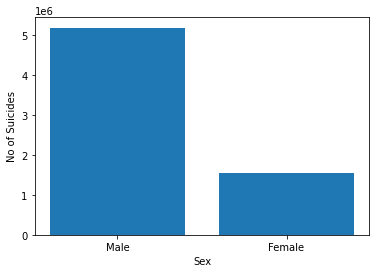

In [ ]:
sex = ['Male', 'Female']
suicides = [MS,FS]
plt.bar(sex,suicides)
plt.xlabel("Sex")
plt.ylabel("No of Suicides")

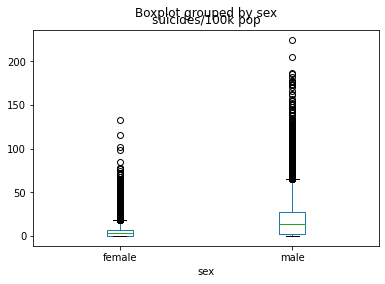

In [ ]:
master_df.boxplot(by='sex', column="suicides/100k pop",grid=False)

In [ ]:
age_list=sorted(master_df["age"].unique().tolist())
age_list.remove('5-14 years')
age_list.insert(0,'5-14 years')
age_list

['5-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

Text(0, 0.5, 'No of Suicides')

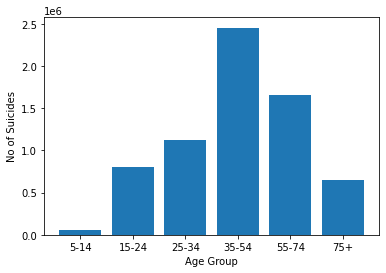

In [ ]:
suicides_age=[]
for age in age_list:
  S=master_df[master_df["age"]==age]['suicides_no'].sum()
  suicides_age.append(S)
ages=['5-14','15-24','25-34','35-54','55-74','75+']
plt.bar(ages,suicides_age)
plt.xlabel("Age Group")
plt.ylabel("No of Suicides")

Text(0, 0.5, 'No of Suicides per 100,000 population')

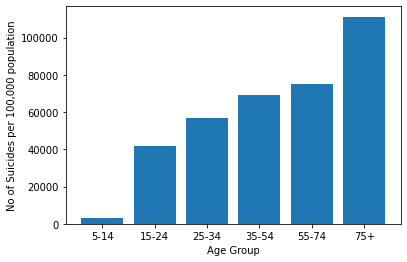

In [ ]:
Rel_suicides_age=[]
for age in age_list:
  S=master_df[master_df["age"]==age]['suicides/100k pop'].sum()
  Rel_suicides_age.append(S)
plt.bar(ages,Rel_suicides_age)
plt.xlabel("Age Group")
plt.ylabel("No of Suicides per 100,000 population")

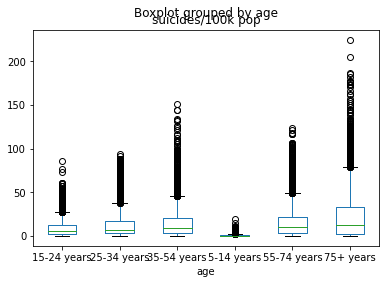

In [ ]:
master_df.boxplot(by='age', column="suicides/100k pop",grid=False)

Clearly as age increases, tendency of a person to do suicide increases

In [ ]:
CM=master_df.corr()
CM

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.094529,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.430096,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.710697,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.025240,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.305193,0.771228
gdp_for_year ($),0.094529,0.430096,0.710697,0.025240,0.305193,1.000000,0.303405
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,0.303405,1.000000


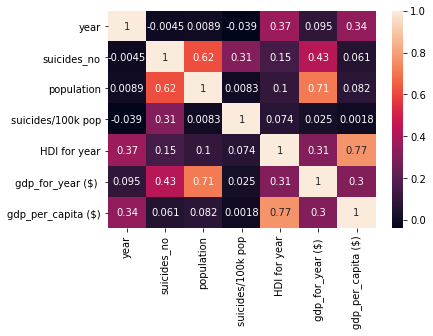

In [ ]:
import seaborn as sn
sn.heatmap(CM,annot=True)
plt.show()

Text(0, 0.5, 'HDI')

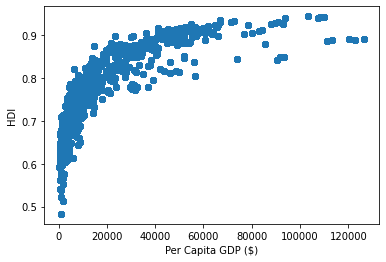

In [ ]:
pcgdp=master_df["gdp_per_capita ($)"]
plt.scatter(pcgdp,hdi)
plt.xlabel("Per Capita GDP ($)")
plt.ylabel("HDI")

HDI increases as Per Capita GDP increases as expected

# Q2

In [ ]:
import pandas as pd
prodf=pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")
display(prodf)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [ ]:
procols=prodf.columns.values
procols

array(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'urgency_text', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'merchant_profile_picture',
       'product_url', 'product_picture', 'product_id', 'theme',
       'crawl_month'], dtype=object)

In [ ]:
print('Number of Records = '+str(prodf.shape[0]))
print('Number of Variables = '+str(prodf.shape[1]))

Number of Records = 1573
Number of Variables = 43


In [ ]:
prodf.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,2789.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [ ]:
prodf.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [ ]:
prodf.nunique()

title                           1201
title_orig                      1203
price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                           192
rating_count                     761
rating_five_count                605
rating_four_count                440
rating_three_count               384
rating_two_count                 262
rating_one_count                 330
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
h

In [ ]:
prodf.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [ ]:
print("Number of records with no missing entries = "+ str(prodf.dropna().shape[0]))

Number of records with no missing entries = 62


In [ ]:
prodf.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


### Types of Variables
**Boolean:** uses_ad_boosts, shipping_is_express, merchant_has_profile_picture, badge_local_product, badge_product_quality, badge_fast_shipping<br>
**Categorical:** product_color, shipping_option_name, origin_country, product_url, product_picture, product_id, merchant_profile_picture, merchant_id, merchant_title, merchant_name, merchant_info_subtitle, urgency_text, tags, title, title_orig<br>
**Ordinal:** product_variation_size_id, shipping_option_price, badges_count<br>
**Integer:** retail_price, countries_shipped_to, merchant_rating_count, inventory_total, product_variation_inventory, rating_count, rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count, units_sold<br>
**Continuous:** price, rating, merchant_rating

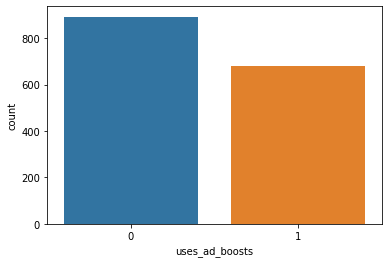

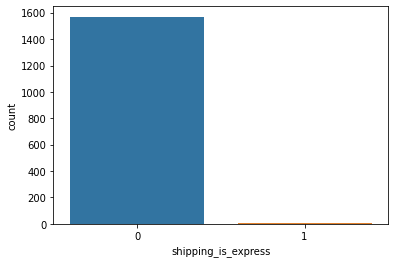

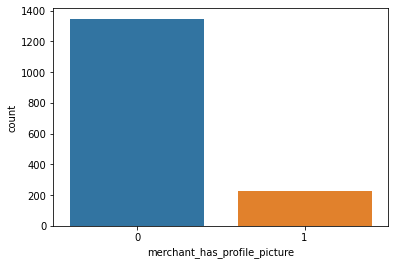

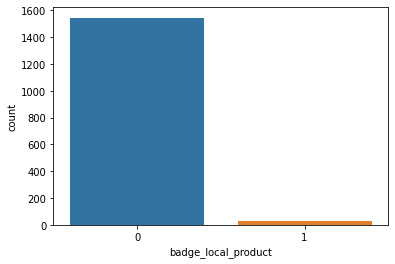

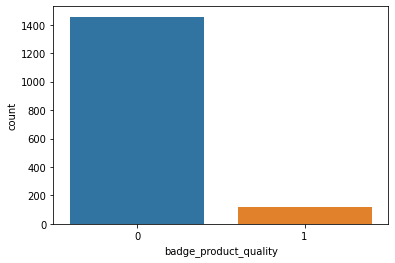

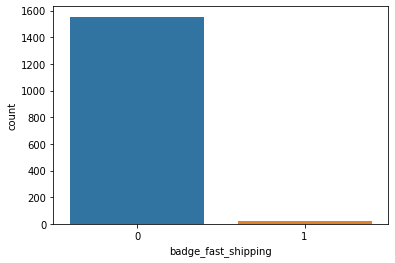

In [ ]:
boolean=["uses_ad_boosts", "shipping_is_express", "merchant_has_profile_picture", "badge_local_product", "badge_product_quality", "badge_fast_shipping"]
import seaborn as sn
import matplotlib.pyplot as plt
for obj in boolean:
  plt.figure()
  sn.countplot(x=prodf[obj])

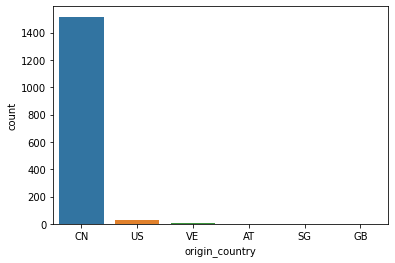

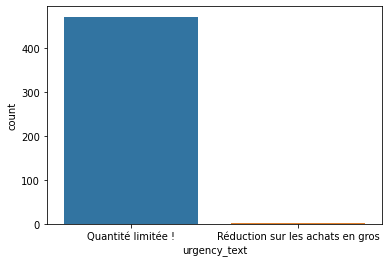

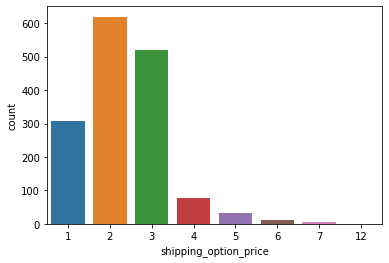

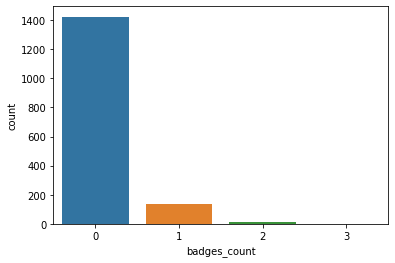

In [ ]:
catg=["origin_country","urgency_text","shipping_option_price","badges_count"]
for obj in catg:
  plt.figure()
  sn.countplot(x=prodf[obj])

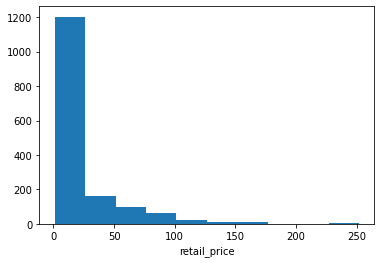

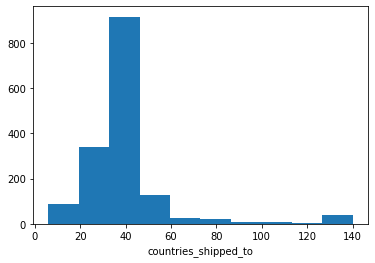

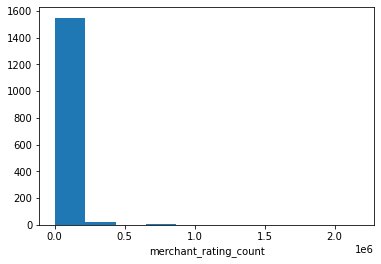

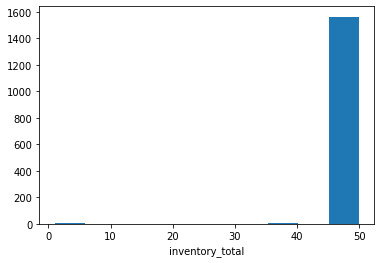

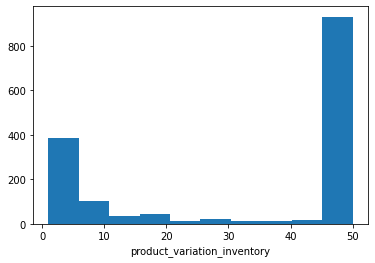

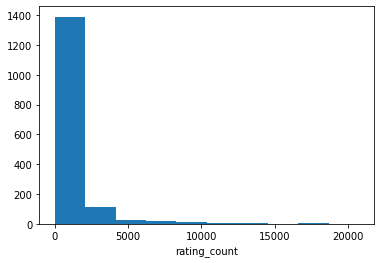

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


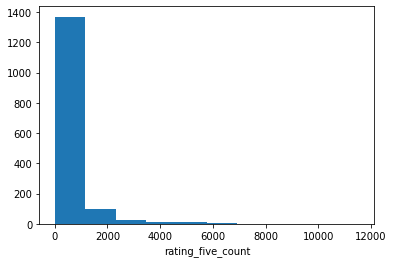

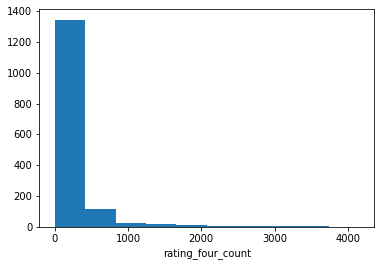

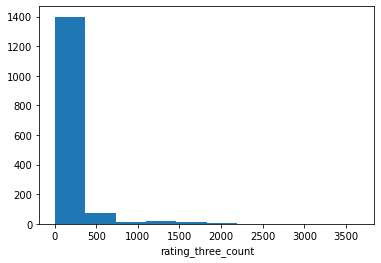

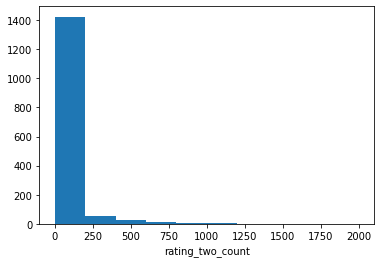

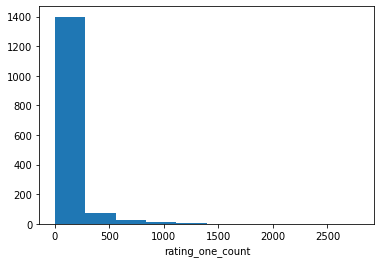

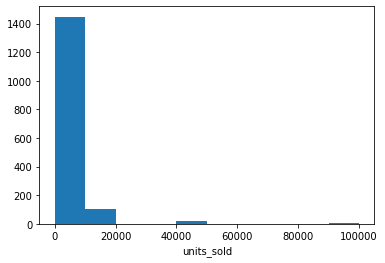

In [ ]:
proint=["retail_price", "countries_shipped_to", "merchant_rating_count", "inventory_total", "product_variation_inventory", "rating_count", "rating_five_count", "rating_four_count", "rating_three_count", "rating_two_count", "rating_one_count", "units_sold"]
for obj in proint:
  plt.hist(prodf[obj])
  plt.xlabel(obj)
  plt.show()

In [ ]:
prodf[proint].mode()

,retail_price,countries_shipped_to,merchant_rating_count,inventory_total,product_variation_inventory,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,units_sold
0,7.0,41.0,32168.0,50.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0
1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1.0,NaN


In [ ]:
import numpy as np
sop=np.array(prodf["shipping_option_price"].value_counts())
sop

array([619, 520, 308,  76,  32,  12,   5,   1])

In [ ]:
sopsum=np.sum(sop)
sopprob=sop/sopsum
gisop = 1 - np.sum(np.square(sopprob))
gisop

0.694707130700889

In [ ]:
oc=np.array(prodf["origin_country"].value_counts())
ocsum=np.sum(oc)
ocprob=oc/ocsum
gioc = 1 - np.sum(np.square(ocprob))
gioc

0.05034330991732816

GINI Index for "origin_country" variable is quite low. Therefore no diversity in data, this is also confirmed from its count plot above.

In [ ]:
prodisc=boolean+catg+proint
for obj in prodisc:
  f=np.array(prodf[obj].value_counts())
  fsum=np.sum(f)
  p=f/fsum
  gi = 1 - np.sum(np.square(p))
  print("Gini Index for variable "+obj+" = "+str(gi))

Gini Index for variable uses_ad_boosts = 0.4910034195129266
Gini Index for variable shipping_is_express = 0.005072890468486468
Gini Index for variable merchant_has_profile_picture = 0.24606428651969892
Gini Index for variable badge_local_product = 0.036192438434824004
Gini Index for variable badge_product_quality = 0.13769551260159818
Gini Index for variable badge_fast_shipping = 0.025105796359336185
Gini Index for variable origin_country = 0.05034330991732816
Gini Index for variable urgency_text = 0.00421939042323527
Gini Index for variable shipping_option_price = 0.694707130700889
Gini Index for variable badges_count = 0.17502765396194275
Gini Index for variable retail_price = 0.9531076910144124
Gini Index for variable countries_shipped_to = 0.9570239042584878
Gini Index for variable merchant_rating_count = 0.9982641758634361
Gini Index for variable inventory_total = 0.012669293372061685
Gini Index for variable product_variation_inventory = 0.6503338885006804
Gini Index for variable 

High Gini Index (close to 1) indicates great diversity in data, whereas low (close to zero) indicates variable dominantly attains a specific value.

In [ ]:
procont=["price","rating","merchant_rating"]
for item in procont:
  print("\033[1m"+item+"\033[0m")
  colm=prodf[item]
  print("Mean="+str(round(colm.mean(),2)))
  print("Variance="+str(round(colm.var(),2)))
  print("Skew="+str(round(colm.skew(),2)))
  print("Median="+str(round(colm.median(),2)))
  print("Inter-quartile Range="+str(round(colm.quantile(0.25),2))+"-"+str(round(colm.quantile(0.75),2)))

price
Mean=8.33
Variance=15.46
Skew=1.32
Median=8.0
Inter-quartile Range=5.81-11.0
rating
Mean=3.82
Variance=0.27
Skew=-0.53
Median=3.85
Inter-quartile Range=3.55-4.11
merchant_rating
Mean=4.03
Variance=0.04
Skew=-1.03
Median=4.04
Inter-quartile Range=3.92-4.16


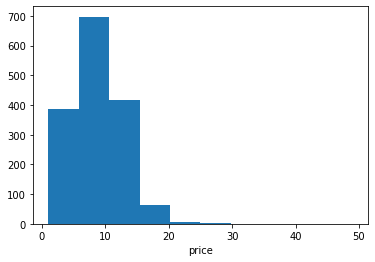

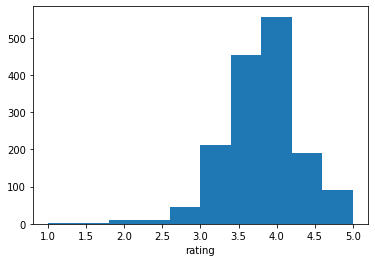

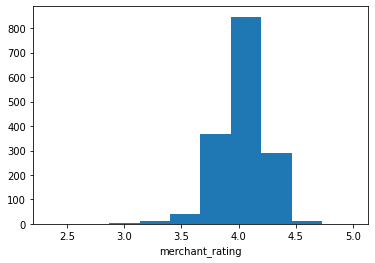

In [ ]:
for obj in procont:
  plt.hist(prodf[obj])
  plt.xlabel(obj)
  plt.show()

Text(0, 0.5, 'No of Products')

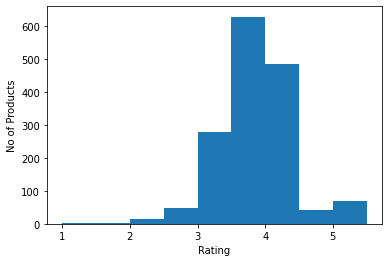

In [ ]:
plt.hist(prodf["rating"],bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
plt.xlabel("Rating")
plt.ylabel("No of Products")

Text(0, 0.5, 'No of Products')

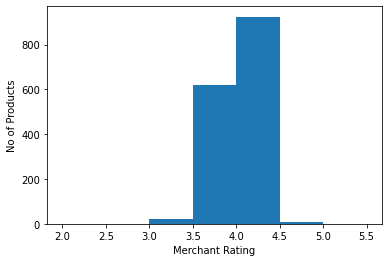

In [ ]:
plt.hist(prodf["merchant_rating"],bins=[2,2.5,3,3.5,4,4.5,5,5.5])
plt.xlabel("Merchant Rating")
plt.ylabel("No of Products")

Text(0, 0.5, 'No of Products')

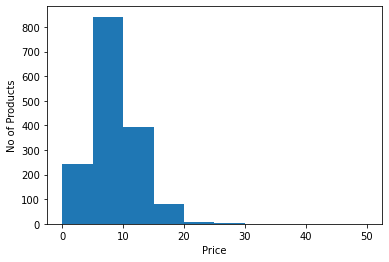

In [ ]:
plt.hist(prodf["price"],bins=[0,5,10,15,20,25,30,35,40,45,50])
plt.xlabel("Price")
plt.ylabel("No of Products")

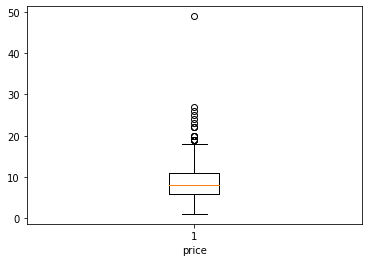

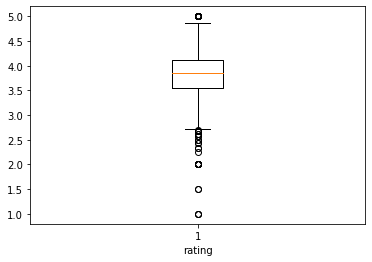

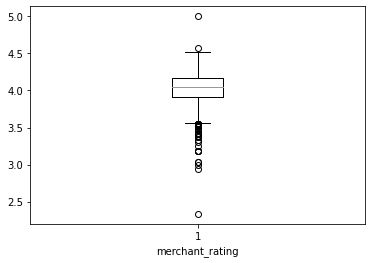

In [ ]:
for obj in procont:
  plt.boxplot(prodf[obj])
  plt.xlabel(obj)
  plt.show()

1.31589130005404


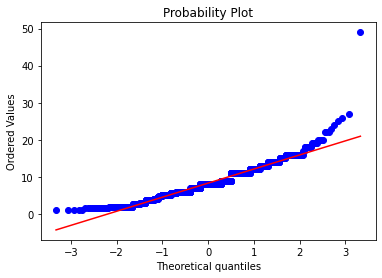

-0.530912194657049


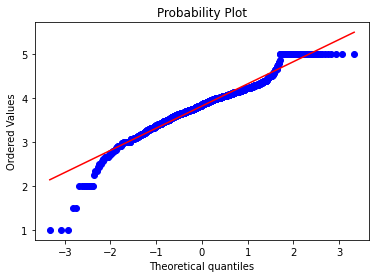

-1.029755428442294


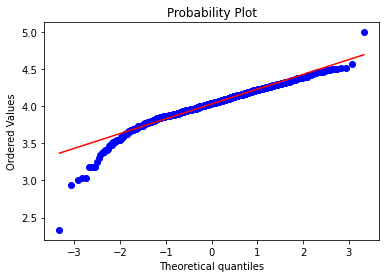

In [ ]:
for obj in procont:
  col=prodf[obj]
  print(col.skew())
  ss.probplot(col,plot=plt)
  plt.show()

-0.8398475384973607


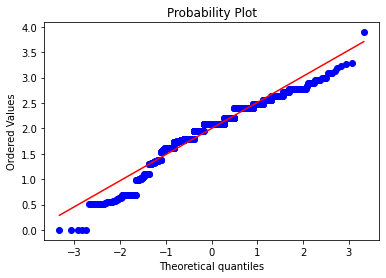

-2.194029402738226


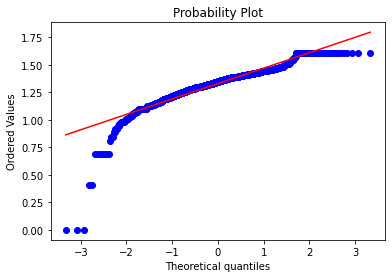

-1.6632525912022558


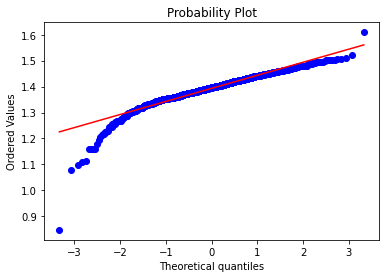

In [ ]:
import math
for obj in procont:
  col=prodf[obj].apply(lambda x:math.log(x))
  print(col.skew())
  ss.probplot(col,plot=plt)
  plt.show()

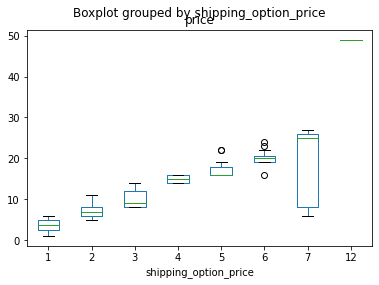

In [ ]:
prodf.boxplot(by='shipping_option_price', column="price",grid=False)

As shipping price increases, price of product increases

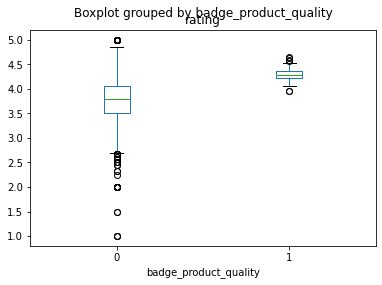

In [ ]:
prodf.boxplot(by='badge_product_quality', column="rating",grid=False)

Product classified as one with high quality has got better ratings

<BarContainer object of 1573 artists>

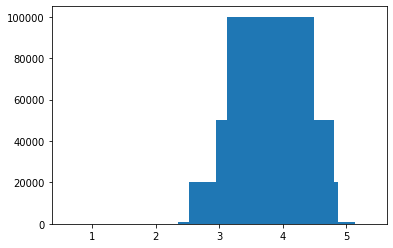

In [ ]:
plt.bar(prodf["rating"],prodf["units_sold"])

<BarContainer object of 1573 artists>

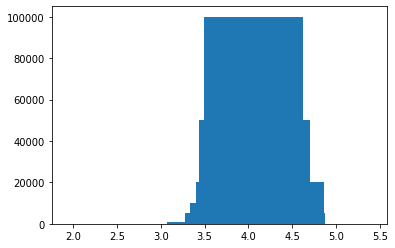

In [ ]:
plt.bar(prodf["merchant_rating"],prodf["units_sold"])

In [ ]:
CM2=prodf.corr()
CM2

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
price,1.000000,0.304748,-0.024815,-0.073269,0.053469,-0.001911,-0.001800,0.000547,-0.012581,-0.010668,0.004193,0.063542,0.069592,0.009512,0.087336,0.274819,0.872580,0.146751,-0.033312,-0.168222,NaN,-0.023790,0.047121,0.017612
retail_price,0.304748,1.000000,0.012638,-0.035325,0.024106,0.053872,0.053113,0.061300,0.048548,0.046051,0.051060,0.019625,0.022677,0.000098,0.032201,0.118842,0.262516,-0.010047,0.035599,-0.003041,NaN,0.029159,0.054399,0.030683
units_sold,-0.024815,0.012638,1.000000,-0.016055,0.039478,0.899464,0.876231,0.891116,0.894243,0.866685,0.832816,0.045402,-0.007544,0.063187,-0.000898,0.133846,-0.030987,-0.008308,-0.013553,0.005608,NaN,0.272897,0.122504,0.143529
uses_ad_boosts,-0.073269,-0.035325,-0.016055,1.000000,-0.049410,-0.043936,-0.044368,-0.044739,-0.042531,-0.044983,-0.041281,0.038173,0.061471,0.001697,0.038265,-0.135384,-0.061495,-0.018641,-0.017439,0.042395,NaN,0.029735,-0.022564,0.004235
rating,0.053469,0.024106,0.039478,-0.049410,1.000000,0.054112,0.138416,0.100638,0.047221,0.004735,-0.031759,0.201503,0.005724,0.264360,-0.013413,0.031954,0.067963,0.024168,0.046423,-0.053156,NaN,0.033837,0.237305,0.012585
rating_count,-0.001911,0.053872,0.899464,-0.043936,0.054112,1.000000,0.983337,0.995923,0.981485,0.946133,0.911414,0.077648,-0.002285,0.082852,0.044762,0.134246,-0.005928,-0.001137,-0.001843,0.008076,NaN,0.258168,0.141255,0.155415
rating_five_count,-0.001800,0.053113,0.876231,-0.044368,0.138416,0.983337,1.000000,0.981201,0.932647,0.873690,0.828767,0.117374,0.000530,0.135919,0.037748,0.126482,-0.000858,0.005528,-0.001114,0.000670,NaN,0.248611,0.169999,0.154454
rating_four_count,0.000547,0.061300,0.891116,-0.044739,0.100638,0.995923,0.981201,1.000000,0.976391,0.933168,0.891921,0.068560,-0.007695,0.076321,0.038845,0.134769,-0.003915,-0.005099,-0.000657,0.014094,NaN,0.253750,0.149374,0.151164
rating_three_count,-0.012581,0.048548,0.894243,-0.042531,0.047221,0.981485,0.932647,0.976391,1.000000,0.984866,0.952137,0.026146,-0.009543,0.020376,0.043169,0.135106,-0.018403,-0.008435,0.001135,0.016963,NaN,0.266071,0.117123,0.139161
rating_two_count,-0.010668,0.046051,0.866685,-0.044983,0.004735,0.946133,0.873690,0.933168,0.984866,1.000000,0.982860,-0.000340,-0.011179,-0.016938,0.052018,0.133624,-0.018417,-0.011331,-0.002154,0.018730,NaN,0.261776,0.097294,0.135635


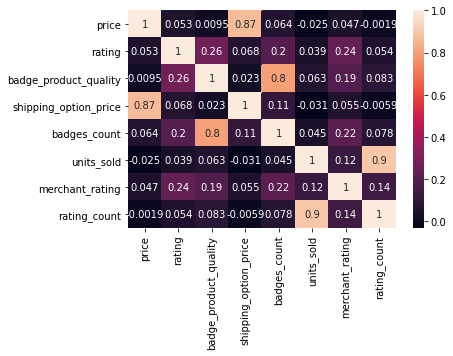

In [ ]:
CM3=prodf[["price","rating","rating_count","badges_count","badge_product_quality","shipping_option_price","badges_count","units_sold","merchant_rating","uses_ad_boosts"]].corr()
sn.heatmap(CM3,annot=True)
plt.show()

Price & Shipping_Option_Price are highly correlated. Perhaps, the grade of shipping price is calculated based on product price.<br>
Rating_Count & Units_Sold are highly correlated. Greater the number of ratings means more users have experienced the product or just indicates popularity and people in turn buy more such products. Strangely the value of rating itself doesn't influence the sales.

In [ ]:
df=pd.read_csv("unique-categories.sorted-by-count.csv")
df.head(10)

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual
5,636,Plus Size
6,580,sleeveless
7,549,Dress
8,540,Shorts
9,507,Tops


These are the Top 10 tags